In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

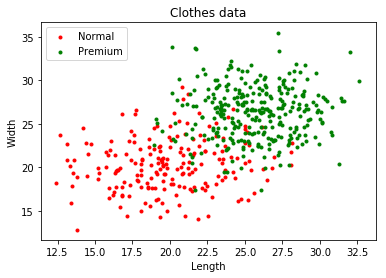

In [7]:
# Visualize the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [8]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [10]:
# Apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# Training fit
from commonfunctions import print_classification_results, plot_classification_summary
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[158   0]
 [  0 242]]
Accuracy score: 1.0
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       242

avg / total       1.00      1.00      1.00       400



In [12]:
# Testing fit 
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



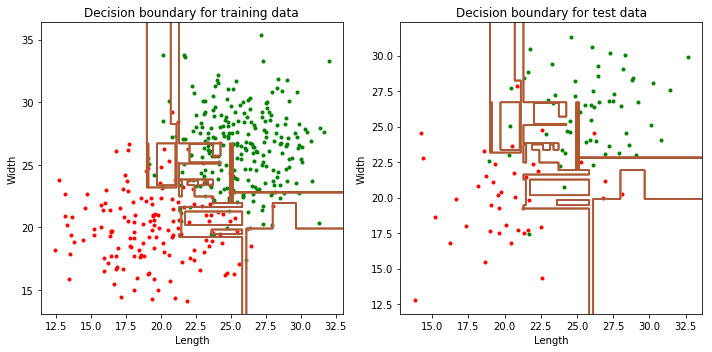

In [13]:
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

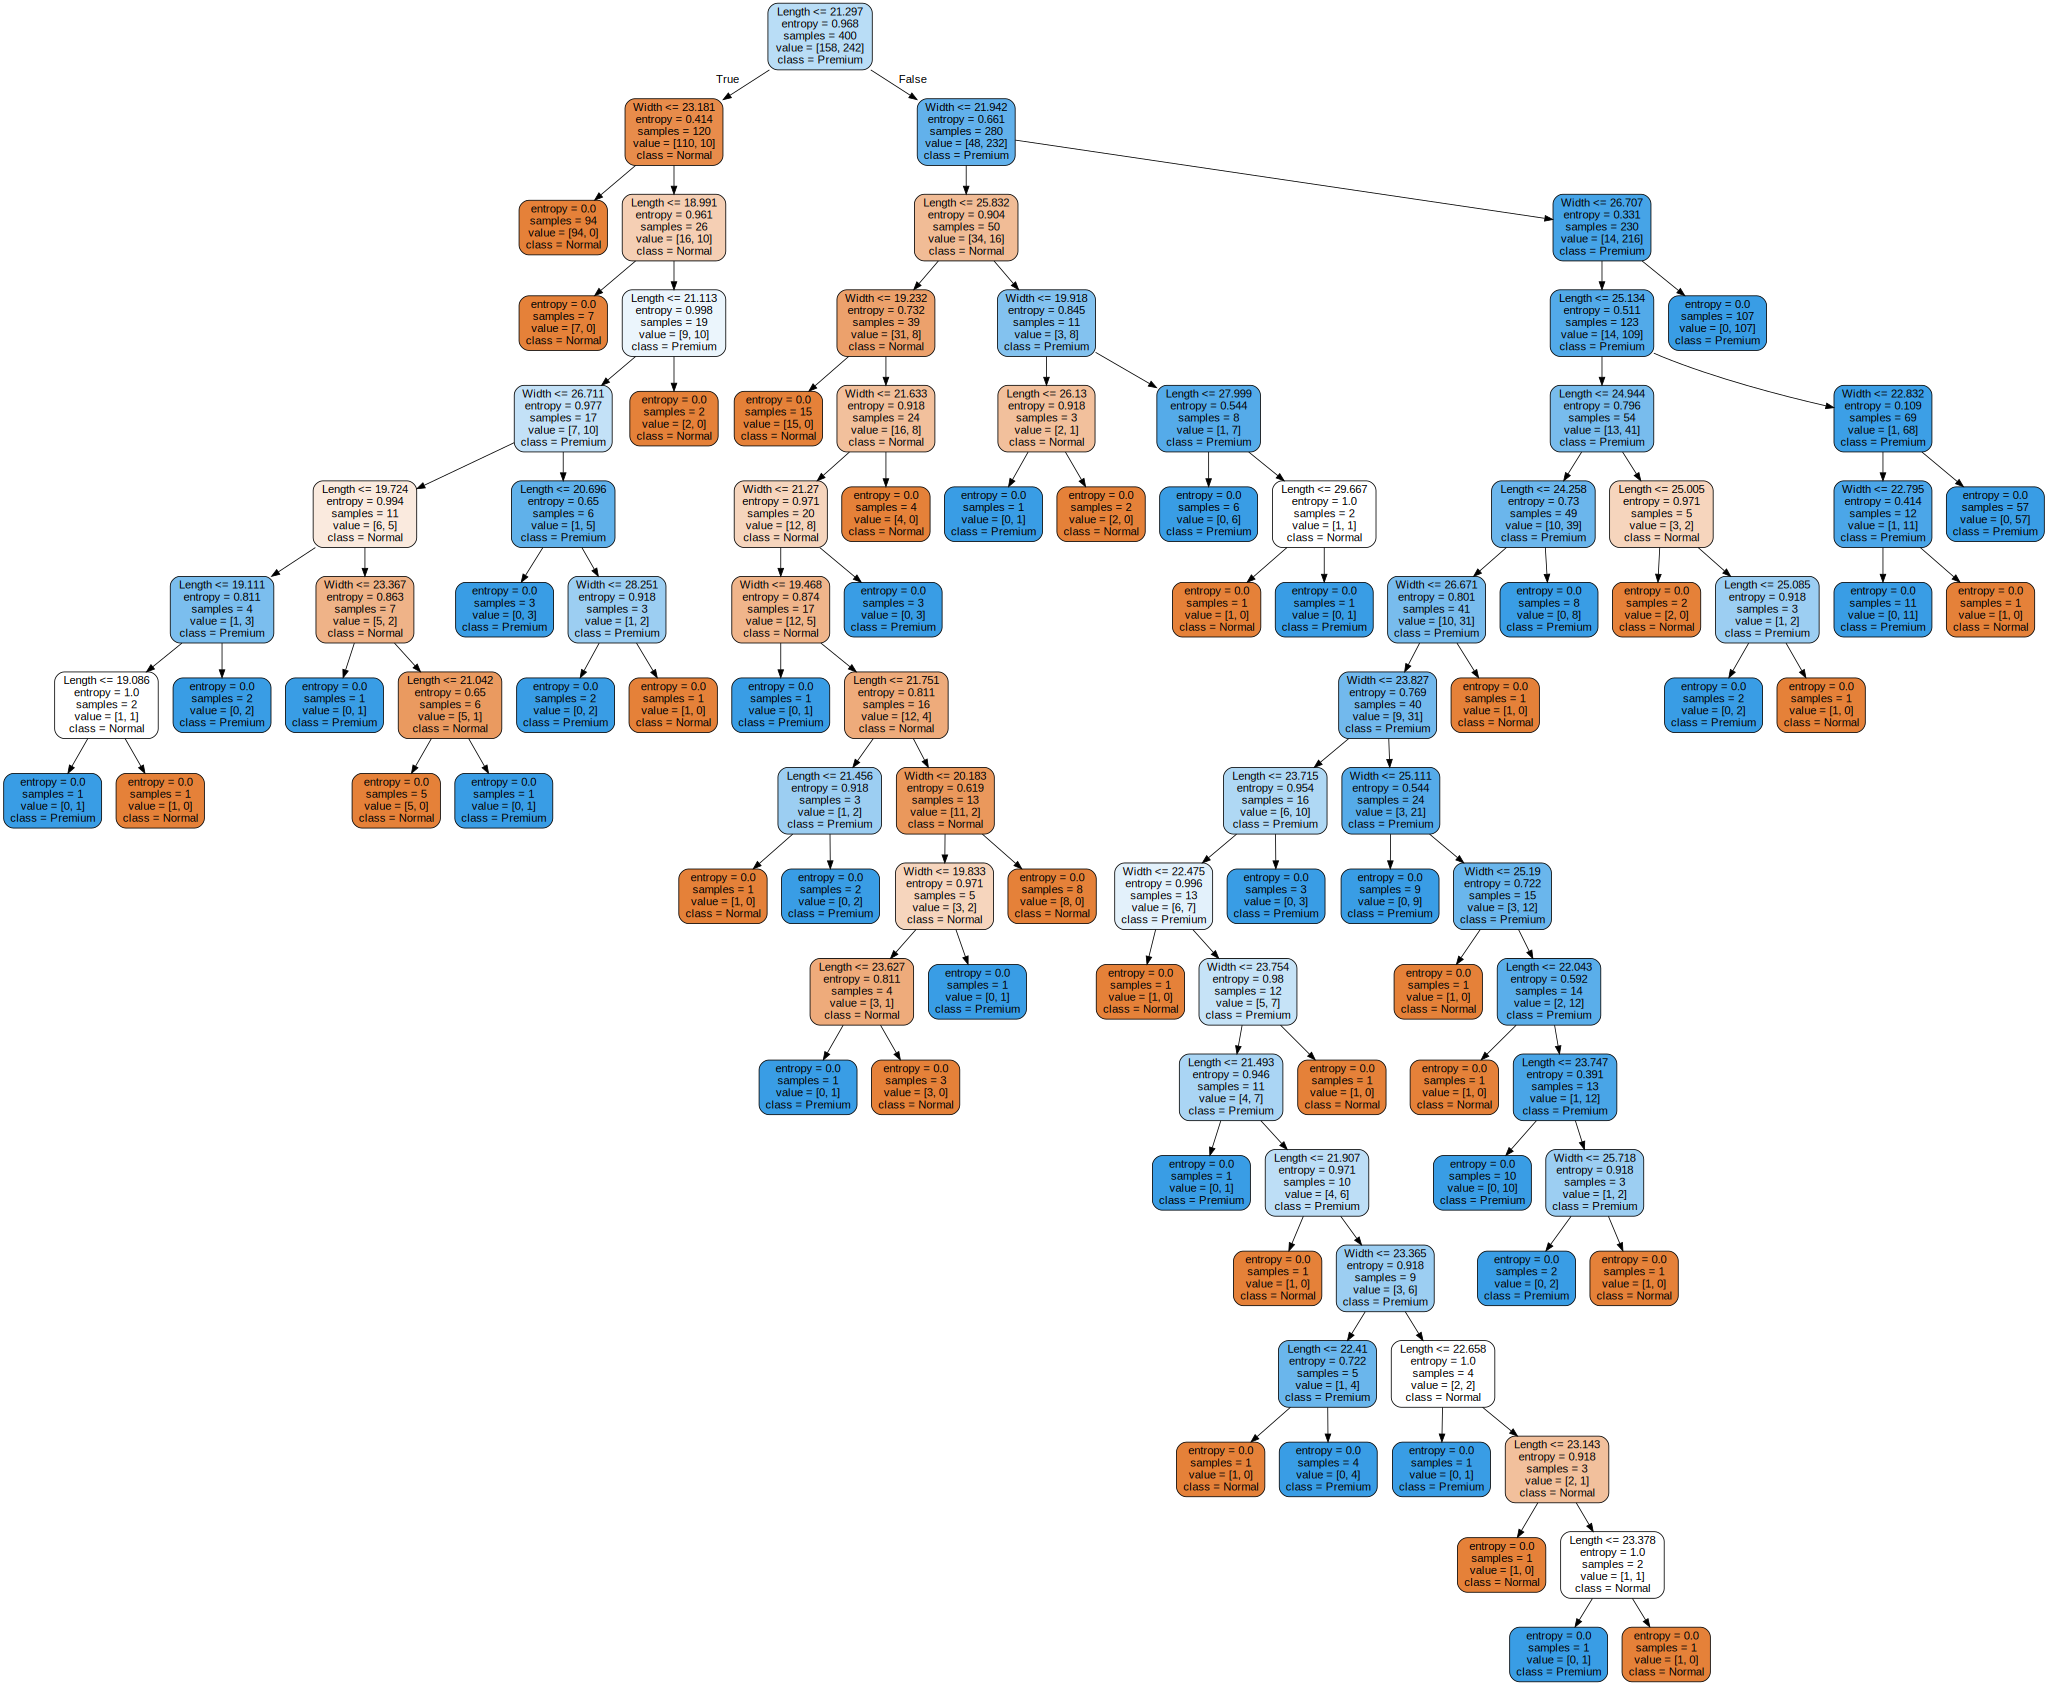

In [14]:
# Visualize the decision tree
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(classifier, out_file=None,
                                    feature_names=['Length', 'Width'],
                                    class_names=['Normal', 'Premium'],
                                    filled=True, rounded=True)
 
graph = graphviz.Source(dot_data) 
graph

Confusion Matrix:
 [[158   0]
 [  0 242]]
Accuracy score: 1.0
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       158
          1       1.00      1.00      1.00       242

avg / total       1.00      1.00      1.00       400

Confusion Matrix:
 [[33  9]
 [ 5 53]]
Accuracy score: 0.86
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.79      0.82        42
          1       0.85      0.91      0.88        58

avg / total       0.86      0.86      0.86       100



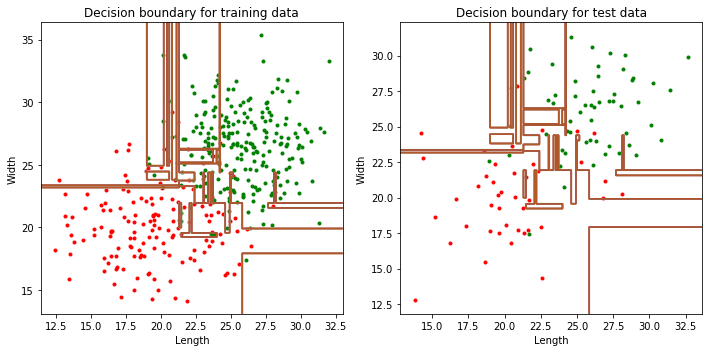

In [15]:
# Perform the same operations with feature scaling
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

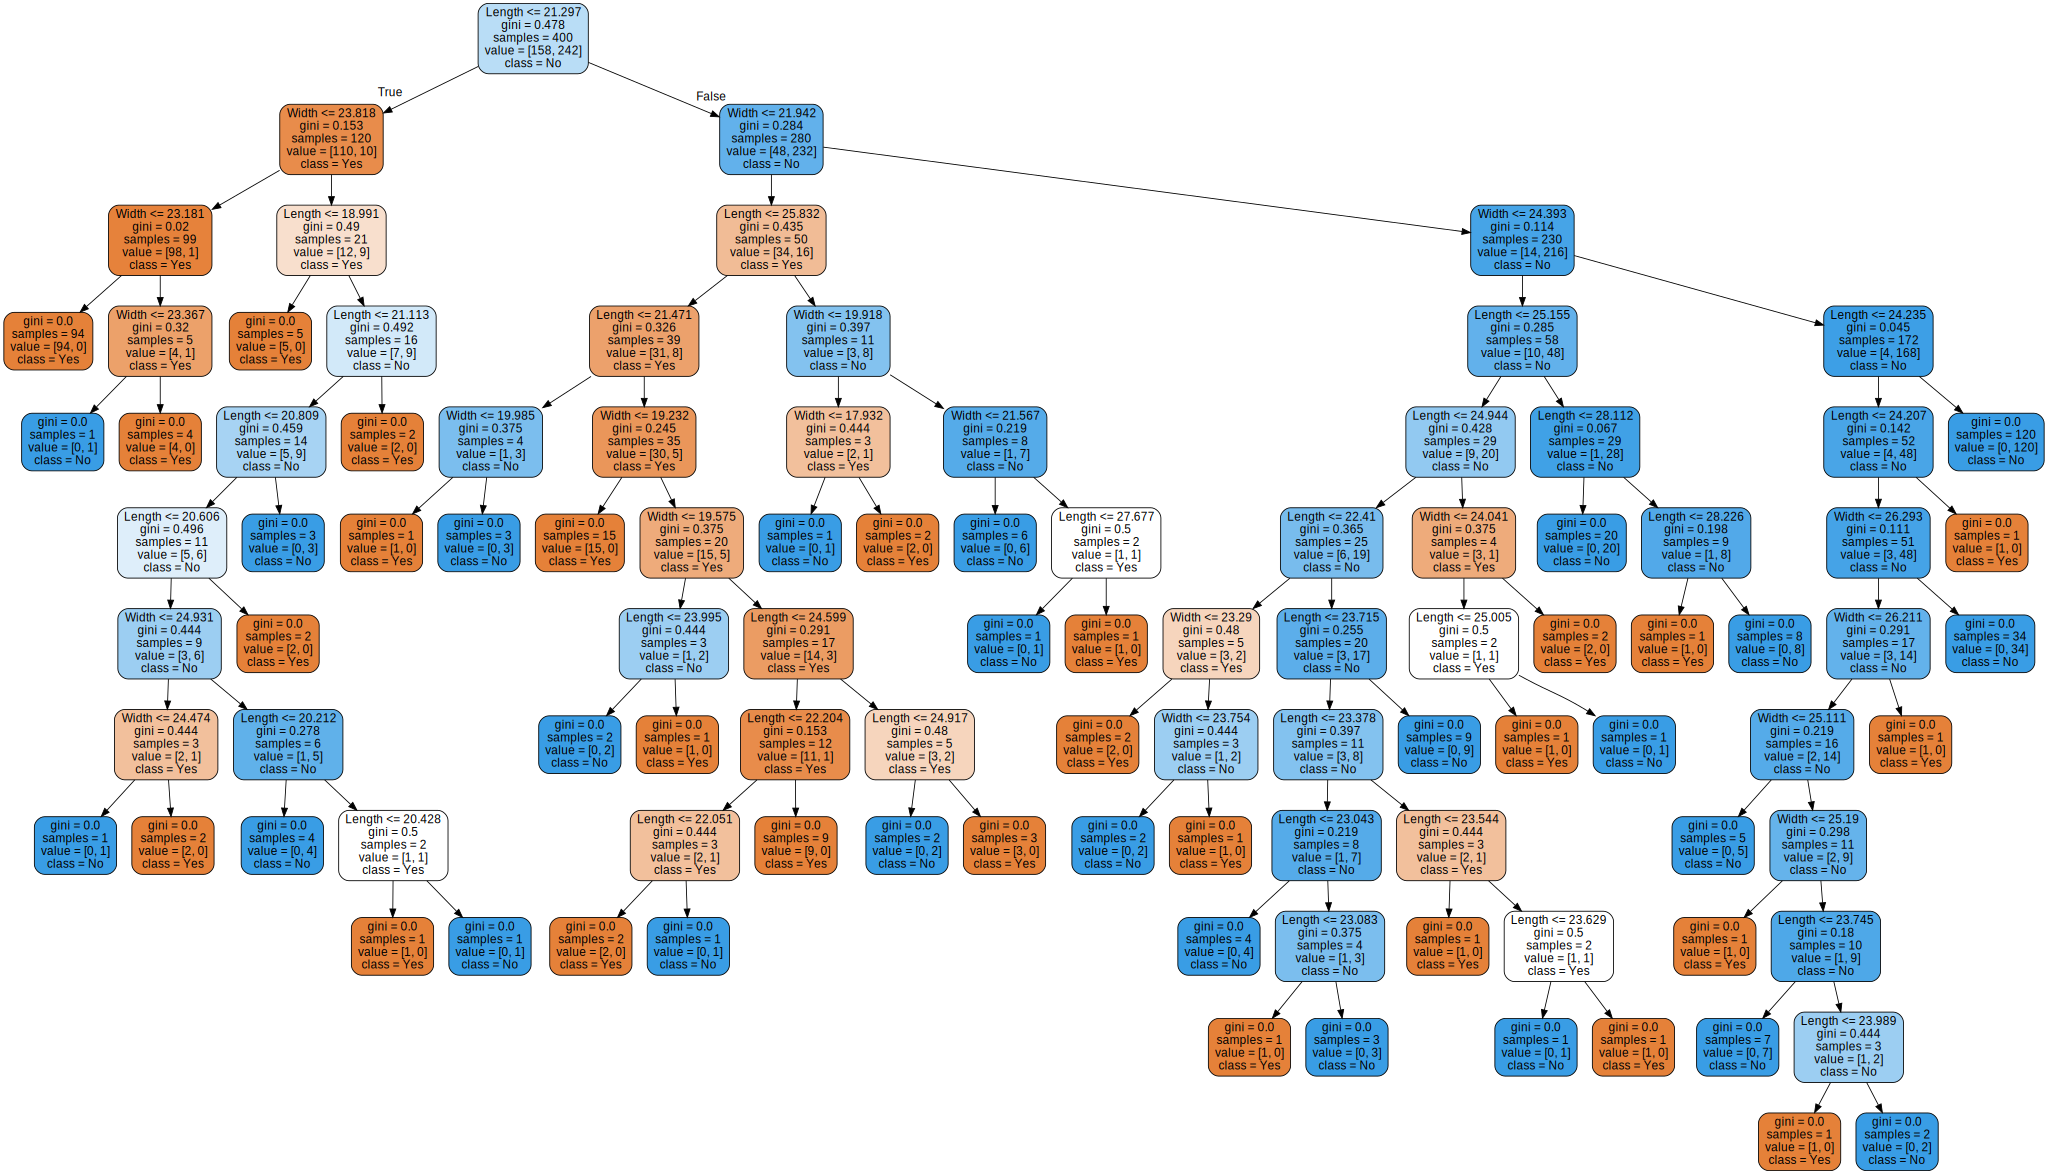

In [16]:
dot_data = export_graphviz(classifier, out_file=None,
                                    feature_names=['Length', 'Width'],
                                    class_names=['Yes', 'No'],
                                    filled=True, rounded=True)
 
graph = graphviz.Source(dot_data) 
graph